# Simple examples

This notebook is associated with:
* the manuscript "Non-parametric power-law surrogates" which currently (2021-12-14) is under review at PRX; and
* the module constrained_power_law_surogates.

This notebook is designed very briefly to illustrate generation of different types of power-law surrogates from synthetic data and an empirical time series.

The code is provided without warranty or guarantee.

In [1]:
# Simple examples of use of surrogate generation code.
# 
from constrained_power_law_surrogates import gen_typ_p_l_surrogate, gen_power_law_surr_list, ident_cut_off_const, estim_scale_exp
# 
import numpy as np

In [2]:
# Generate power-law sequence
# Generate surrogates from this sequence using different methods
# Print the resulting sequences

# Generate short time series from a power-law with chosen exponent and lower cut-off.
gamma = 2; x_min = 3; N = 10;
seq = gen_typ_p_l_surrogate(gamma, x_min, N)

print('Generating from power-law with known scale exponent:')
surr_list = gen_power_law_surr_list(N*[0], surr_method='know', x_min=x_min, num_surr=1, scale_exp=2)
seq = surr_list[0]
print(seq)

print('Original observation:')
surr_list = gen_power_law_surr_list(seq, surr_method='obse')
print(surr_list[0])

print('Constrained power-law surrogate(s):')
surr_list = gen_power_law_surr_list(seq, surr_method='cons', x_min=x_min, num_surr=4)
print(surr_list)

print('Typical power-law surrogate(s):')
surr_list = gen_power_law_surr_list(seq, surr_method='typi', x_min=x_min, num_surr=9)
print(surr_list)

print('Bootstrap surrogate(s):')
surr_list = gen_power_law_surr_list(seq, surr_method='boot', x_min=x_min, num_surr=7)
print(surr_list)

print('Shuffle surrogate(s):')
surr_list = gen_power_law_surr_list(seq, surr_method='shuf', x_min=x_min, num_surr=5)
print(surr_list)

print('Constrained Markov order power-law surrogate(s):')
surr_list = gen_power_law_surr_list(seq, surr_method='mark', x_min=x_min, o=1, b=3, num_surr=3, num_trans=10**3)
print(surr_list)

print('Constrained ordinal pattern power-law surrogate(s):')
surr_list = gen_power_law_surr_list(seq, surr_method='ordi', x_min=x_min, L=3, num_surr=2, num_trans=10**3)
print(surr_list)

print('Unknown input surr_method surrogate(s):')
surr_list = gen_power_law_surr_list(seq, surr_method='unknown', x_min=x_min, num_surr=4)
print(surr_list)

Generating from power-law with known scale exponent:
[12, 3, 12, 12, 3, 30, 5, 6, 40, 14]
Original observation:
[12, 3, 12, 12, 3, 30, 5, 6, 40, 14]
Constrained power-law surrogate(s):
[[6, 24, 3, 3, 9, 20, 80, 12, 5, 7], [3, 3, 3, 3, 9, 10, 80, 12, 20, 56], [24, 6, 6, 48, 3, 15, 5, 12, 10, 7], [3, 6, 3, 24, 96, 15, 10, 6, 5, 14]]
Typical power-law surrogate(s):
[[4, 4, 11, 4, 3, 87, 6, 3, 28, 5], [7, 10, 560, 7, 6, 15, 5, 5, 4, 4], [3, 17, 64, 27, 5, 30, 41, 3, 3, 4], [6, 28, 7, 11, 540, 11, 13, 19, 35, 5], [41, 84, 3, 36, 4, 5, 3, 19, 7, 22], [8, 10, 8, 3, 3, 7, 5, 6, 7, 14], [22, 3, 21, 18, 3, 3, 3, 440, 10, 33], [8, 7, 20, 5, 7, 4, 4, 7, 101, 176], [6, 100, 36, 7, 4, 6, 7, 14, 7, 3]]
Bootstrap surrogate(s):
[[3, 3, 3, 6, 14, 5, 14, 3, 12, 12], [14, 12, 3, 40, 40, 12, 3, 6, 30, 3], [14, 12, 14, 3, 5, 6, 40, 3, 6, 12], [3, 40, 12, 40, 12, 12, 12, 12, 30, 3], [30, 3, 40, 30, 5, 14, 5, 6, 6, 12], [12, 5, 12, 6, 12, 12, 5, 6, 30, 40], [5, 12, 30, 40, 5, 30, 12, 12, 14, 12]]
Shuffle surr

59555 observations above estimated lower cut-off x_min = 1, of which we will consider 1024 consecutive values starting from a randomly chosen point.


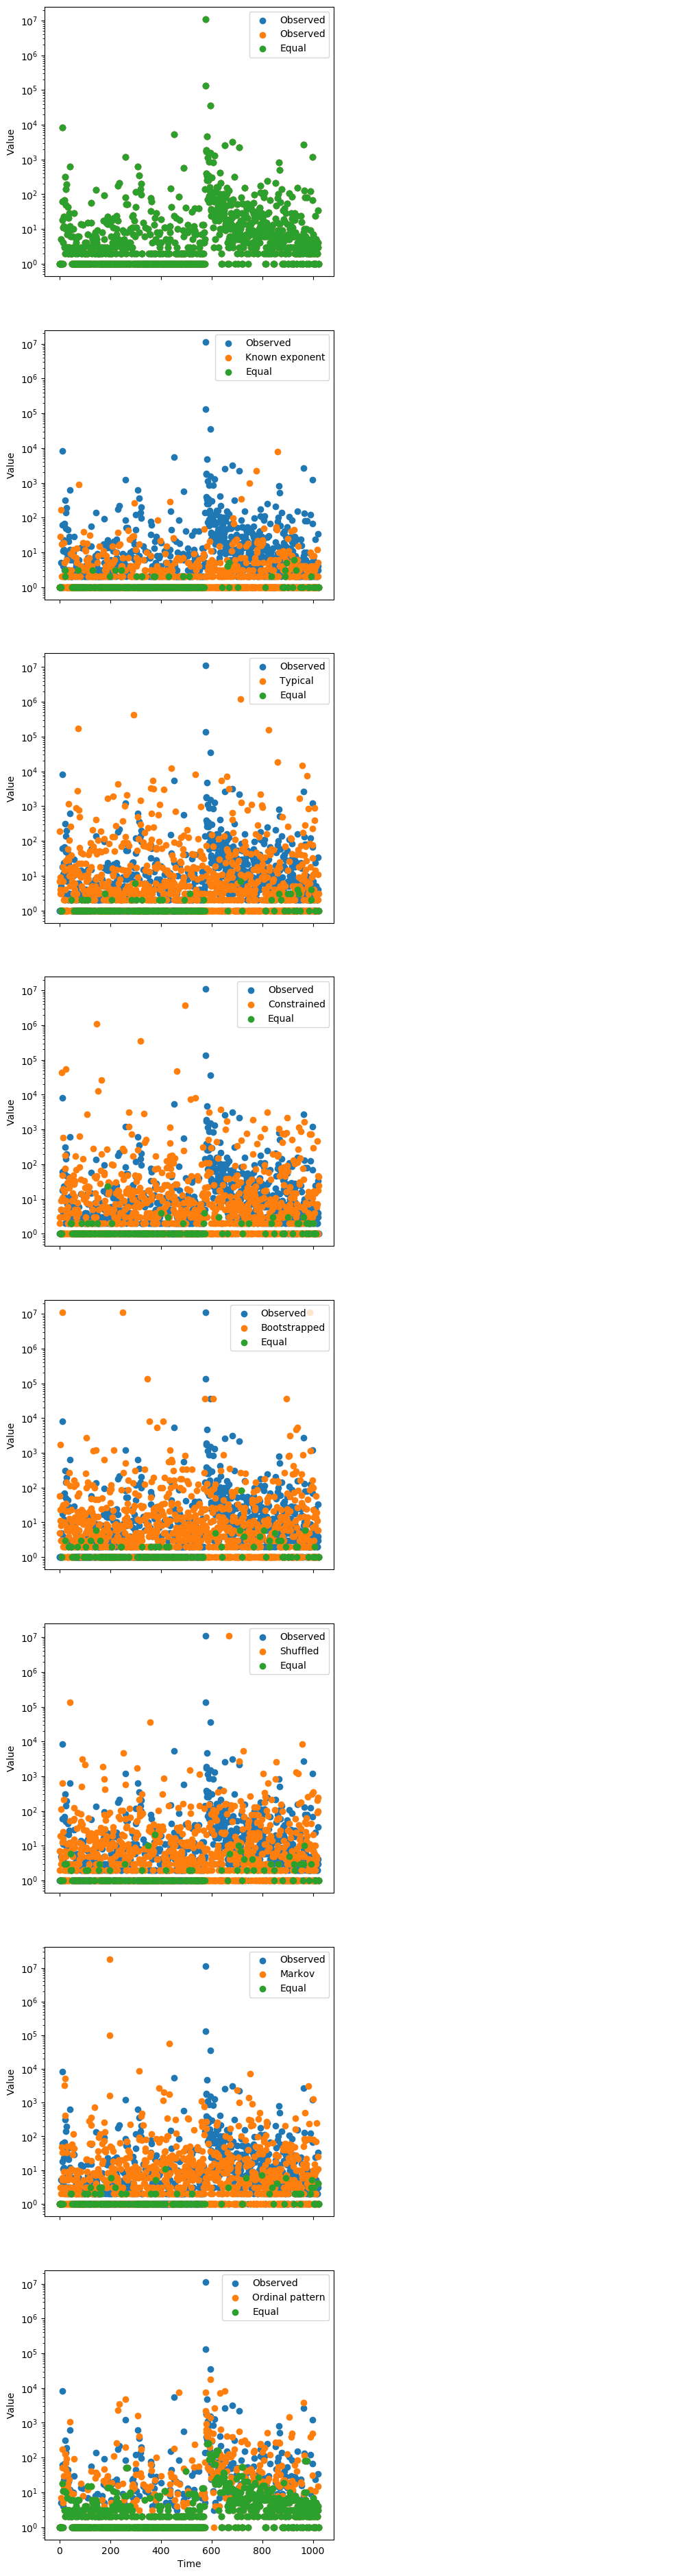

In [3]:
# Load empirical data from text file
# Generate surrogates from this empirical data using different methods
# Juxtapose each surrogate with original observation.
# 

NMax = 1024# Maximum length of time series

# Load observation from text file
# file_name_str = 'normed-flares.txt'; dist_str = 'flares'; #x_min = 1;, N = 1,711, NG = 1,711
file_name_str = 'energy.txt'; dist_str = 'earthquakes'; #x_min = 1;, N = 59,555, NG = 59,555

data = np.loadtxt(file_name_str)

#Estimate lower cut-off x_min by minimise KS-distance from maximum likelihood power-law
(x_min, _, _, _, _) = ident_cut_off_const(data)
seq = [int(np.round(val)) for val in data if val >= x_min]
N0 = len(seq)

N0 = len(data)
if (N0 > NMax):
    N = NMax
    start_point = np.random.randint(0, N0 - N)
    seq = seq[start_point:(start_point + N)]
else:
    N = N0
    
print(str(N0) + ' observations above estimated lower cut-off x_min = ' + str(x_min) + ', of which we will consider ' + str(N) + ' consecutive values starting from a randomly chosen point.');

#The list of surrogates to be considered, and their names
surr_method_list = ['obse', 'know', 'typi', 'cons', 'boot', 'shuf', 'mark', 'ordi']
surr_method_name_list = ['Observed', 'Known exponent', 'Typical', 'Constrained', 'Bootstrapped', 'Shuffled', 'Markov', 'Ordinal pattern']

scale_exp = 2#Known scale exponent (Known scale exponent "know" surrogates only)
o = 1#Markov order (Markov order surrogates "mark" only)
b = 3#Use bins of logarithmic width log(b) (Markov order surrogates "mark" only)
L = 16#Length of ordinal patterns (ordinal pattern surrogates "ordi" only)
num_trans = 10**5#Number of transitions (Markov order "mark" and ordinal pattern surrogates "ordi" only)

#Generate and plot realisation of each type of surrogate
num_surr_types = len(surr_method_list)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(num_surr_types, 2, sharex='col', sharey='none', figsize=(2*6, 6*num_surr_types))
for i in range(num_surr_types):
    surr_method = surr_method_list[i]
    surr_method_name = surr_method_name_list[i]
    surr_val_seq_list = gen_power_law_surr_list(seq, surr_method=surr_method, x_min=x_min, num_surr=1, scale_exp=scale_exp, o=o, b=b, L=L, num_trans=num_trans)
    surr_val_seq = surr_val_seq_list[0]
    scale_exp_m_l = estim_scale_exp(surr_val_seq, x_min)#Find maximum likelihood scale exponent of surrogate realisation
    match_seq = [seq[ii] if surr_val_seq[ii] == seq[ii] else np.nan for ii in range(N)]
    ax_subplot = ax[i][0]
    ax_subplot.scatter(list(range(N)), seq)
    ax_subplot.scatter(list(range(N)), surr_val_seq)
    ax_subplot.scatter(list(range(N)), match_seq)
    ax_subplot.set_yscale('log')
    ax_subplot.legend(labels=['Observed', surr_method_name, 'Equal'])
    ax_subplot.set_ylabel('Value')
    ax_subplot = ax[i][1]
    ax_subplot.axis('off')
ax[-1][0].set_xlabel('Time')
plt.show()